**Types of Charts in Data Visualization**

Data visualization involves representing data graphically to gain insights and communicate information effectively. Different types of charts are used depending on the nature of the data and the insights being conveyed. Here are four commonly used types of charts:

### 1. Line Chart:

- **Description**: A line chart is used to show trends or changes over time or continuous variables. It connects data points with straight lines.
  
- **Use Cases**:
  - Showing trends in stock prices over time.
  - Visualizing changes in temperature throughout the year.

### 2. Bar Chart:

- **Description**: A bar chart is used to compare categories or discrete values by representing them as bars of different heights.
  
- **Use Cases**:
  - Comparing sales performance across different regions.
  - Showing the distribution of grades in a class.
  
### 3. Pie Chart:

- **Description**: A pie chart is used to display the proportions of a whole by dividing a circle into slices.
  
- **Use Cases**:
  - Showing the composition of a budget.
  - Visualizing the market share of different products.

### 4. 3D Plot:

- **Description**: A 3D plot is used to visualize relationships between three variables in a three-dimensional space.
  
- **Use Cases**:
  - Analyzing the relationship between three-dimensional data points.
  - Visualizing complex surfaces or functions.
  
### Conclusion:

Understanding the different types of charts and their applications is essential for effective data visualization. By choosing the right type of chart, data scientists can present their findings clearly and accurately, enabling better decision-making and communication of insights.

There is given example below as in other reports.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
from collections import Counter
df = pd.read_csv(r"C:/Users/User/Downloads/F1DriversDataset.csv")

df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


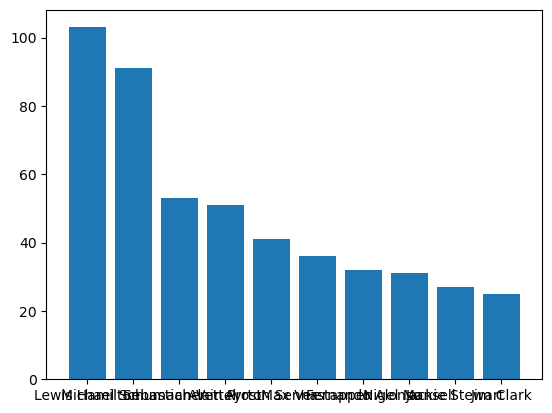

In [4]:
df = df.sort_values(by="Race_Wins", ascending=False)

plt.bar(df['Driver'].head(10), df['Race_Wins'].head(10))
plt.show()

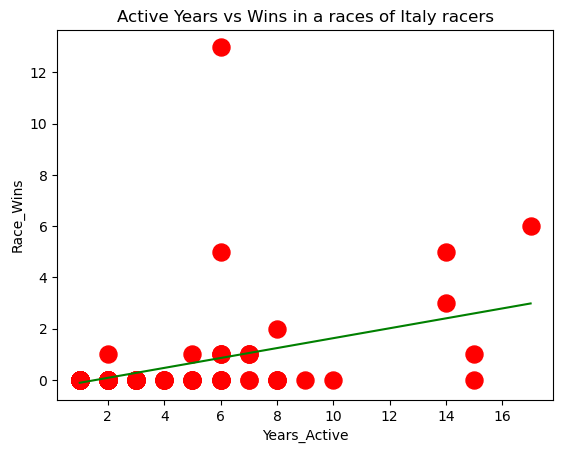

In [5]:
f1 = df[df['Nationality'] == 'Italy']
f1 = f1.sort_values(by="Years_Active", ascending=False)

slope, intercept, r, p, std_err = stats.linregress(f1['Years_Active'], f1['Race_Wins'])
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, f1['Years_Active']))
plt.scatter(f1['Years_Active'], f1['Race_Wins'], s = 150, c = 'red')
plt.plot(f1['Years_Active'], mymodel, c = 'green')
plt.xlabel('Years_Active')
plt.ylabel('Race_Wins')
plt.title('Active Years vs Wins in a races of Italy racers')
plt.show()

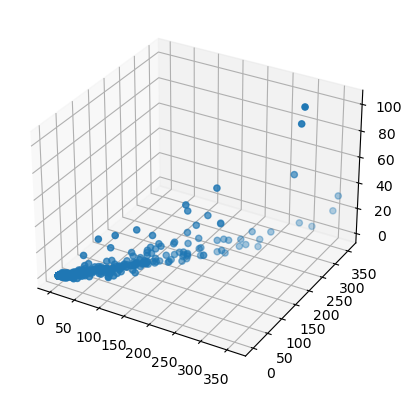

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Race_Entries'], df['Race_Starts'], df['Race_Wins'])
plt.show()

In [7]:
nations = Counter(df['Nationality'])
nations

Counter({'United Kingdom': 164,
         'United States': 160,
         'Italy': 99,
         'France': 72,
         'West Germany': 39,
         'Brazil': 32,
         'Argentina': 25,
         'Switzerland': 24,
         'South Africa': 23,
         'Belgium': 23,
         'Japan': 21,
         'Australia': 18,
         'Netherlands': 16,
         'Austria': 16,
         'Spain': 15,
         'Canada': 15,
         'Germany': 14,
         'Sweden': 11,
         'Finland': 9,
         'New Zealand': 9,
         'Mexico': 6,
         'Denmark': 5,
         'Portugal': 5,
         'Ireland': 5,
         'Monaco': 4,
         'Rhodesia': 4,
         'Uruguay': 4,
         'Colombia': 3,
         'Venezuela': 3,
         'Russia': 3,
         'East Germany': 3,
         'India': 2,
         'Thailand': 2,
         'Poland': 1,
         'Liechtenstein': 1,
         'RAF': 1,
         'Malaysia': 1,
         'China': 1,
         'Chile': 1,
         'Monaco\xa0Netherlands': 1,
         'Cze

In [8]:
nations1 = ['United Kingdom', 'United States', 'Italy']
nations2 = {key: nations[key] for key in nations1}

total = len(df['Nationality'])
percentage = {key: nations2[key] / total * 100 for key in nations2}
sums = sum(percentage.values())
others = 100 - sums
result = {key: percentage[key] for key in percentage}
result['Others'] = others
result

{'United Kingdom': 18.89400921658986,
 'United States': 18.433179723502306,
 'Italy': 11.405529953917052,
 'Others': 51.267281105990776}

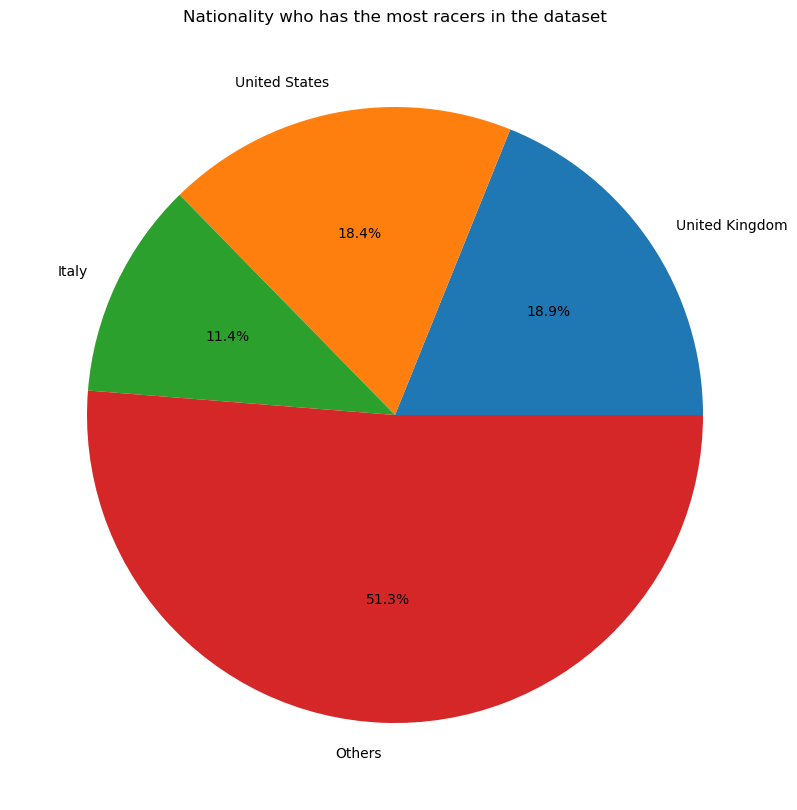

In [7]:
plt.figure(figsize=(10, 10))
plt.pie(result.values(), labels=result.keys(), autopct='%1.1f%%')
plt.title('Nationality who has the most racers in the dataset')
plt.show()

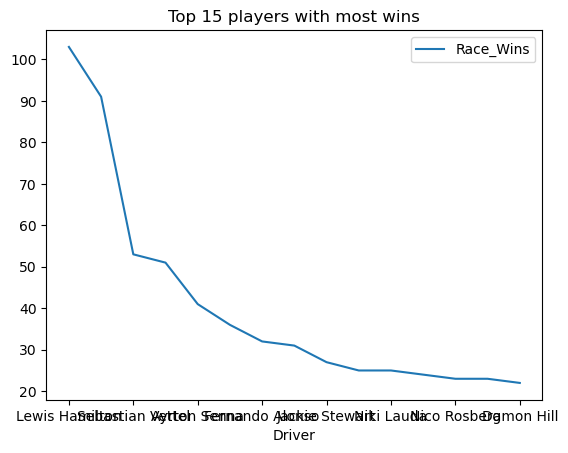

In [9]:
top5 = df.head(15)
top5.plot(x='Driver', y='Race_Wins', kind='line')
plt.title('Top 15 players with most wins')
plt.show()